In [262]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


data_df = pd.read_csv('../Data/data.csv') #data is n x p matrix
labels_df = pd.read_csv('../Data/labels.csv')

data = np.array(data_df)[:,1:]
labels = np.array(labels_df)

In [263]:
data_df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [264]:
print('data shape: '+str(data_df.shape))

data shape: (801, 20532)


In [266]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def reg_PCA(X,k): 
#     """
#     function takes an n x p feature matrix and integer k for number of principal directions wanted
#     returns two arrays:
#     - array with percentages of explained variance in first k principal directions (k x 1)
#     - array with principal directions (k x p)
#     - array with explained variances
#     """

    X = StandardScaler().fit_transform(X)
    pca = PCA(n_components=k)
    pca.fit(X)
    PEV = pca.explained_variance_ratio_
    prin_comp = pca.components_
    EV = pca.explained_variance_
    
    return PEV, prin_comp, EV

In [267]:
PCA_PEV, PCA_PC, PCA_EV = reg_PCA(data,min(data.shape[0],data.shape[1]))

print(PCA_EV[0]/sum(PCA_EV))
print(PCA_PEV[0])
print(sum(PCA_EV))

0.10539781350598686
0.10539781350598708
20289.33000000004


In [268]:
data_scaled = StandardScaler().fit_transform(data)
PCA_PC@((1/800)*(data_scaled.T @ data_scaled))@PCA_PC.T

array([[ 2.13845102e+03, -1.16351373e-13,  1.00364161e-13, ...,
         2.31481501e-14, -5.99520433e-14,  2.94070324e-14],
       [-1.25233157e-13,  1.77617511e+03,  7.26885219e-12, ...,
         1.46549439e-14,  1.02140518e-14,  2.28705943e-14],
       [ 1.08801856e-13,  7.24753590e-12,  1.58461312e+03, ...,
         7.54951657e-15, -9.76996262e-15, -1.14352972e-14],
       ...,
       [ 2.82189094e-14,  1.30936928e-14,  1.23174040e-14, ...,
         1.99681319e+00,  1.19479079e-15, -8.00141203e-17],
       [-5.40548509e-14,  3.68953999e-15, -8.37383548e-15, ...,
         1.24401357e-15,  1.96988726e+00, -8.61940727e-17],
       [ 2.13713140e-14,  2.80664316e-14, -1.20862055e-14, ...,
        -1.00447559e-16,  6.98738703e-17,  4.95857853e-17]])

In [269]:
def threshold_PCA(X,j,k):
#     """
#     function takes
#     - X: n x p feature matrix
#     - j: integer for number of non-zero loadings,
#     - k: integer for number of principal directions wanted
#     returns three arrays:
#     - array with percentages of explained variance in first k principal directions (k x 1)
#     - array with principal directions (k x p)
#     - array with explained variances
#     """   

    PCA_PEV, PCA_PC, PCA_EV = reg_PCA(X,min(X.shape[0],X.shape[1]))
    
    total_var = sum(PCA_EV) 
    
    thresh_PCA_PC = [] 
    thresh_PCA_PEV = []
    thresh_PCA_EV = []
    
    for m in range(k):
        thresh_PCA_PC_m = list(PCA_PC[m])
        thresh_PCA_PC_abs = np.abs(list(PCA_PC[m]))
        for i, value in enumerate(thresh_PCA_PC_abs):
            if i not in np.flip(np.argsort(thresh_PCA_PC_abs))[:j]:
                 thresh_PCA_PC_m[i] = 0
        thresh_PCA_PC.append(np.array([thresh_PCA_PC_m]))
    
    X_scaled = StandardScaler().fit_transform(X)
    
    
    for l in range(k):
        thresh_PCA_EV.append(thresh_PCA_PC[l]@((1/(X_scaled.shape[0]-1))*(X_scaled.T @ X_scaled))@thresh_PCA_PC[l].T)
        thresh_PCA_PEV.append((thresh_PCA_PC[l]@((1/(X_scaled.shape[0]-1))*(X_scaled.T @ X_scaled))@thresh_PCA_PC[l].T)/total_var)
    
    return thresh_PCA_PEV, thresh_PCA_PC,thresh_PCA_EV

In [270]:
thresh_PCA_PEV_100 = threshold_PCA(data,100,1)[0]
thresh_PCA_PEV_500 = threshold_PCA(data,500,1)[0]
thresh_PCA_PEV_1000 = threshold_PCA(data,1000,1)[0]
thresh_PCA_PEV_5000 = threshold_PCA(data,5000,1)[0]
thresh_PCA_PEV_10000 = threshold_PCA(data,10000,1)[0]
thresh_PCA_PEV_15000 = threshold_PCA(data,15000,1)[0]


In [271]:
print(thresh_PCA_PEV_100)
print(thresh_PCA_PEV_500)
print(thresh_PCA_PEV_1000)
print(thresh_PCA_PEV_5000)
print(thresh_PCA_PEV_10000)
print(thresh_PCA_PEV_15000)

[array([[0.00011003]])]
[array([[0.00191965]])]
[array([[0.00589362]])]
[array([[0.05230118]])]
[array([[0.09103797]])]
[array([[0.10380471]])]


In [277]:
import matplotlib.pyplot as plt

def nonzero_load_v_PEV(n_loads,PCA_PEV,thresh_PCA_PEV) :
    plt.plot(n_loads,PCA_PEV,label='regular PCA')
    plt.plot(n_loads,thresh_PCA_PEV,label='PCA with thresholding')
    plt.xlabel('number of non-zero loadings')
    plt.ylabel('percentage of explained variance (PEV)')
    plt.xscale('log')
    plt.title('percentage of explained variance (PEV) vs non-zero loadings')
    plt.legend()

In [278]:
PCA_PEV = [PCA_PEVs[0]]*6
thresh_PCA_PEV = [thresh_PCA_PEV_100,thresh_PCA_PEV_500,thresh_PCA_PEV_1000,thresh_PCA_PEV_5000,thresh_PCA_PEV_10000,thresh_PCA_PEV_15000]
n_loads = [100,500,1000,5000,10000,15000]

thresh_PCA_PEV = np.array(thresh_PCA_PEV).flatten()
thresh_PCA_PEV

array([0.00011003, 0.00191965, 0.00589362, 0.05230118, 0.09103797,
       0.10380471])

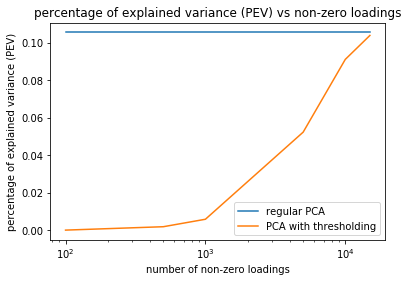

In [279]:
nonzero_load_v_PEV(n_loads,PCA_PEV,thresh_PCA_PEV)